## HEALTHCARE MEDICAL CONDITION PREDICTION MODEL
—-----------------------------------------------------------------------------------------------------------

Name: Farisa Hameed

Organization: Entri Elevate


##  Overview of Problem Statement:
Accurately diagnosing medical conditions is crucial for effective treatment planning and patient care. Machine learning models can help classify medical conditions based on patient demographics, test results, and admission details. This project focuses on building a robust classification model to assist in predicting a patient's medical condition.


##  Objective:
To develop a machine learning model to classify patients' medical conditions (e.g., Cancer, Obesity, Diabetes) based on demographic and clinical data.


## Data Description:
Source: Healthcare dataset provided.

eatures:
Demographics: Age, Gender, Blood Type.

Medical Details: Medical Condition (target variable), Test Results, Medication, Admission Type, Doctor.

Financial Data: Insurance Provider, Billing Amount.

Administrative Details: Room Number, Discharge Date, Date of Admission.


## Import Libraries and Load Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


In [5]:
# Data Collection 
print("\nCollecting Data...")


In [6]:
d=pd.read_csv('healthcare_dataset.csv')
print("\nDataset Loaded....")



Dataset Loaded....


In [7]:
data=pd.DataFrame(d)

In [8]:
data.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [10]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


---------------

## Data Cleaning and Handling Missing Values


In [13]:
# Find any missing values
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [14]:
# Find any Duplicates
data.duplicated().sum()

534

In [15]:
# Remove Duplicates
data = data.drop_duplicates()


In [16]:
data.duplicated().sum()

0

In [17]:
# Remove rows with negative values in 'Billing Amount'
data = data[data['Billing Amount'] >= 0]

# Optionally, reset the index after removing rows
data.reset_index(drop=True, inplace=True)

In [18]:
# Remove irrelevant columns
data.drop(columns=['Name', 'Room Number','Doctor'], inplace=True)

In [19]:
# Check for class distribution
print(data['Medical Condition'].value_counts())

Medical Condition
Arthritis       9207
Diabetes        9197
Hypertension    9131
Obesity         9127
Cancer          9121
Asthma          9077
Name: count, dtype: int64


----------------------------------

## Exploratory Data Analysis (EDA)

In [22]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['Age', 'Billing Amount'], dtype='object')

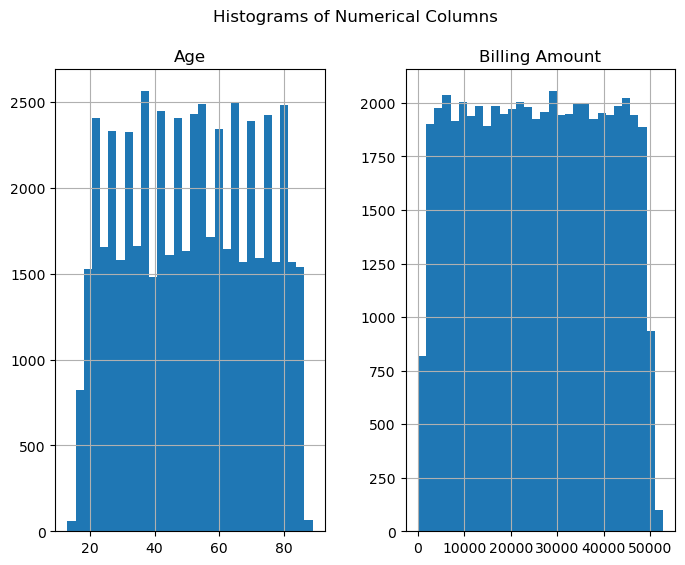

In [23]:
# Plot histograms for numerical columns
data[numerical_columns].hist(bins=30, figsize=(8, 6))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

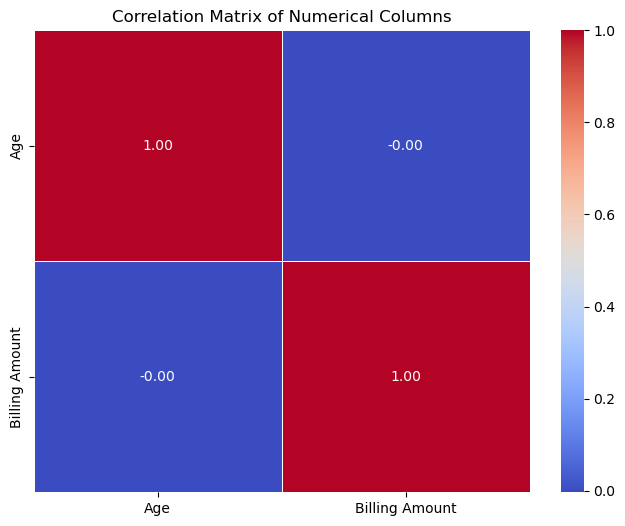

In [24]:
# Correlation heatmap to visualize relationships between numerical columns
corr_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

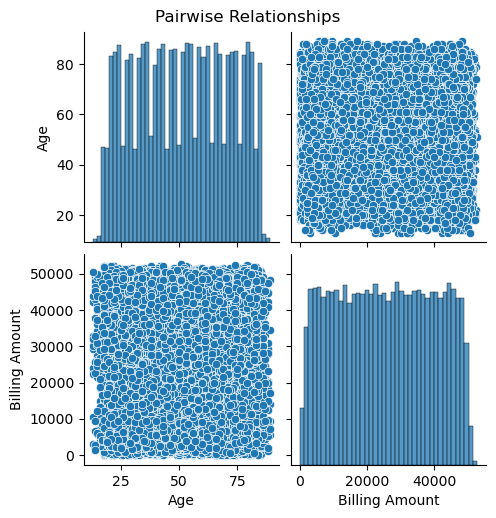

In [25]:
# Pair plot to visualize relationships between numerical columns
sns.pairplot(data[numerical_columns])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

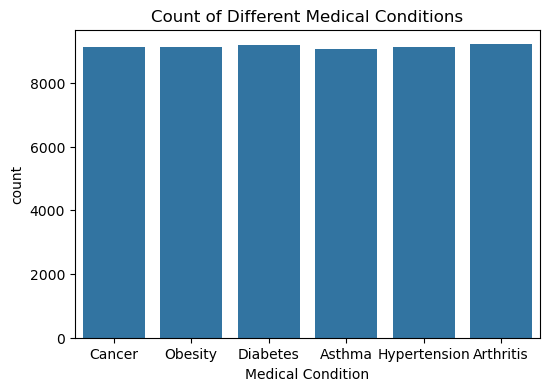

In [26]:
# Bar plot for categorical column (e.g., 'Medical Condition')
plt.figure(figsize=(6, 4))
sns.countplot(x='Medical Condition', data=data)
plt.title('Count of Different Medical Conditions')
plt.show()

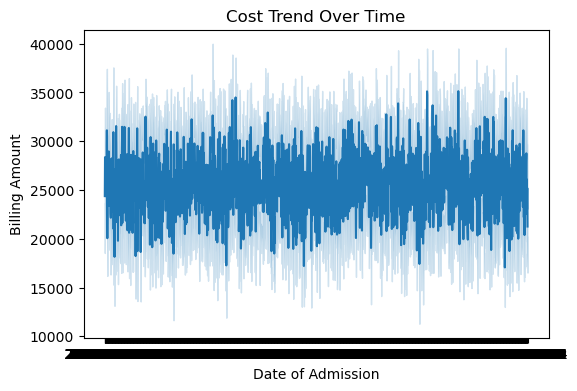

In [27]:
# Line plot for time-series data (if applicable, e.g., cost over time)
# For example, if there is a 'Date' column
plt.figure(figsize=(6, 4))
sns.lineplot(x='Date of Admission', y='Billing Amount', data=data)
plt.title('Cost Trend Over Time')
plt.show()

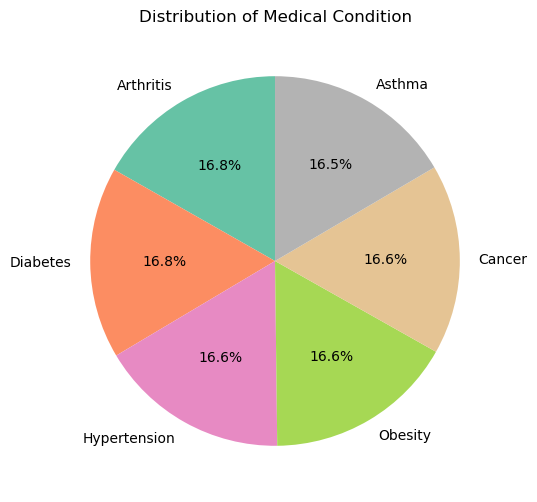

In [28]:
# Pie chart for categorical column (e.g., 'Medical Condition')
condition_counts = data['Medical Condition'].value_counts()
plt.figure(figsize=(8, 6))
condition_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Distribution of Medical Condition')
plt.ylabel('')
plt.show()


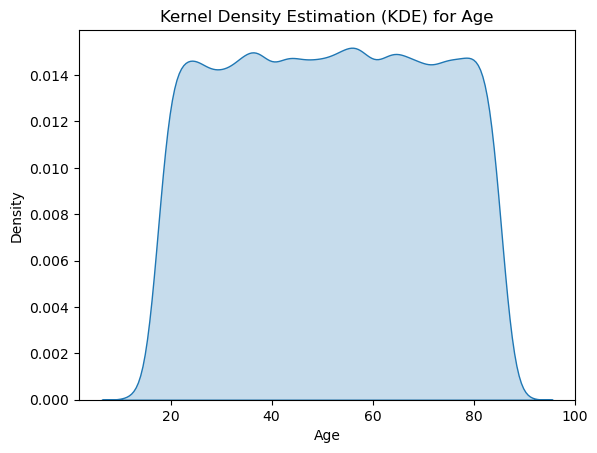

In [29]:
# KDE plot for a numerical column 
sns.kdeplot(data['Age'], fill=True)
plt.title('Kernel Density Estimation (KDE) for Age')
plt.show()

----------

## Feature Engineering

In [32]:
# Convert target variable to numeric using LabelEncoder
label_encoder = LabelEncoder()

# Encode target variable (Medical Condition)
data['Medical Condition'] = label_encoder.fit_transform(data['Medical Condition'])
#Unique values in Hospital
data['Hospital'] = label_encoder.fit_transform(data['Hospital'])

In [33]:
# Encode categorical features
categorical_features = ['Gender', 'Blood Type', 'Admission Type', 'Insurance Provider', 'Test Results', 'Medication']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)


In [34]:
# Create derived feature: Length of stay
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])
data['Length of Stay'] = (data['Discharge Date'] - data['Date of Admission']).dt.days
data.drop(columns=['Date of Admission', 'Discharge Date'], inplace=True)

In [35]:
data.columns

Index(['Age', 'Medical Condition', 'Hospital', 'Billing Amount', 'Gender_Male',
       'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+',
       'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-',
       'Admission Type_Emergency', 'Admission Type_Urgent',
       'Insurance Provider_Blue Cross', 'Insurance Provider_Cigna',
       'Insurance Provider_Medicare', 'Insurance Provider_UnitedHealthcare',
       'Test Results_Inconclusive', 'Test Results_Normal',
       'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol',
       'Medication_Penicillin', 'Length of Stay'],
      dtype='object')

In [36]:
# Check encoded result
data.head()

,Age,Medical Condition,Hospital,Billing Amount,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,...,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Test Results_Inconclusive,Test Results_Normal,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Length of Stay
0,30,2,29885,18856.281306,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,2
1,62,5,15984,33643.327287,True,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,6
2,76,5,5459,27955.096079,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,15
3,28,3,12296,37909.782410,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,30
4,43,2,33546,14238.317814,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,20


In [37]:
# Outliers

# Function to find outliers using IQR method

def find_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    
    return outliers

# Find outliers for all numerical columns
outliers = find_outliers_iqr(data, numerical_columns)

# Display outliers count for each column
print("Outliers in each numerical column:")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")


Outliers in each numerical column:
Age: 0 outliers
Billing Amount: 0 outliers


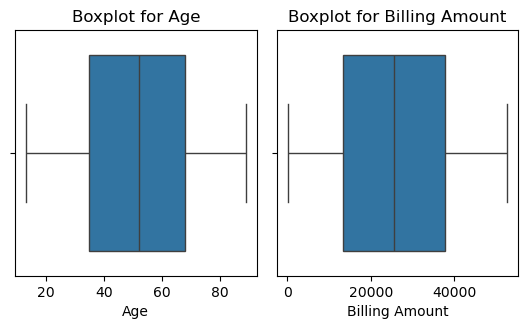

In [38]:
# Visualize outliers using boxplots

plt.figure(figsize=(8, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)  # Adjust the subplot layout based on the number of numerical columns
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

In [39]:
# NO OUTLIERS FOUND

In [40]:
# Check the skewness of all numerical columns
skewness = data[numerical_columns].skew()
print("Skewness of Numerical olumns:")
print(skewness)

Skewness of Numerical olumns:
Age              -0.005800
Billing Amount    0.000029
dtype: float64


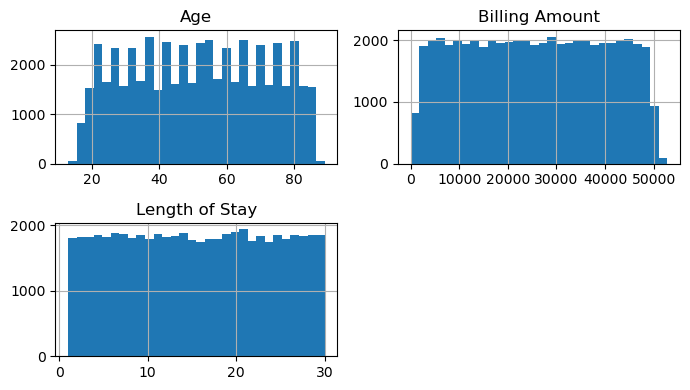

In [41]:
# Visualisation of skewness
data[['Age', 'Billing Amount', 'Length of Stay']].hist(bins=30, figsize=(7, 4))
plt.tight_layout()
plt.show()

In [42]:
# No transformation is needed for these columns based on skewness.

------------

## Split Data into Training and Testing Sets

In [45]:
# Split the data into features (X) and target (y)

x = data.drop('Medical Condition', axis=1)  # Drop target column to get features
y = data['Medical Condition']              # Target variable

In [46]:
# Split into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the shape of training and test sets
print("Train Shape",x_train.shape, x_test.shape)


Train Shape (43888, 24) (10972, 24)


In [47]:
print("Training Features:\n", x_train)
print("Testing Features:\n", x_test)

Training Features:
        Age  Hospital  Billing Amount  Gender_Male  Blood Type_A-  \
45756   21     31230    49719.593977        False          False   
31059   82     37893    25301.823205         True          False   
48213   45     22007     7716.625557         True          False   
40667   26      8525     7336.155863        False          False   
53794   70      2963    30694.539967        False          False   
...    ...       ...             ...          ...            ...   
44732   31      1179    32971.581759         True          False   
54343   53     28056    25165.021798         True          False   
38158   39     33221    13974.419683         True          False   
860     84      5231    36931.482849        False          False   
15795   69     29110    20344.559640         True          False   

       Blood Type_AB+  Blood Type_AB-  Blood Type_B+  Blood Type_B-  \
45756           False           False          False           True   
31059           False

## Feature Selection

In [49]:
# Feature selection using SelectKBest (chi-squared test)

selector = SelectKBest(score_func=chi2, k='all')  # 'k' can be adjusted to select a specific number of features
X_new = selector.fit_transform(x_train, y_train)

# Get the scores for each feature
feature_scores = pd.DataFrame(selector.scores_, index=x.columns, columns=['Score'])
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Display the feature scores
print(feature_scores)



                                            Score
Billing Amount                       85042.716148
Hospital                             46735.881440
Age                                     39.900721
Length of Stay                          25.562403
Blood Type_AB+                          11.010457
Blood Type_B+                            7.641237
Medication_Ibuprofen                     5.679494
Medication_Paracetamol                   5.517685
Test Results_Normal                      5.332268
Medication_Penicillin                    4.317904
Medication_Lipitor                       4.305286
Insurance Provider_UnitedHealthcare      3.766015
Blood Type_A-                            3.572817
Admission Type_Emergency                 3.533587
Insurance Provider_Cigna                 3.166769
Admission Type_Urgent                    2.537074
Blood Type_O+                            1.818012
Blood Type_B-                            1.713578
Blood Type_O-                            1.673183


In [50]:
# Choose the top k features based on score, e.g., top 5 features
top_k_features = feature_scores.head(5)
print(top_k_features)

                       Score
Billing Amount  85042.716148
Hospital        46735.881440
Age                39.900721
Length of Stay     25.562403
Blood Type_AB+     11.010457


---------------------

## Feature Scaling 

In [53]:
# Feature Scaling using Standard Scaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [54]:
# Check
print("Training set shape (features):", x_train_scaled.shape) 
print("Test set shape (features):", x_test_scaled.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (43888, 24)
Test set shape (features): (10972, 24)
Training set shape (target): (43888,)
Test set shape (target): (10972,)


## Model Building

In [56]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Classification': SVC(random_state=42)
}

In [57]:
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training and Evaluating Model: {name}")
    print("-" * 50)

# Fit the model
    model.fit(x_train_scaled, y_train)   
# Make predictions
    y_pred = model.predict(x_test_scaled)

# Metrics Calculation
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted") 
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

 # Store results
    results[name] = {
        "Confusion Matrix": conf_matrix,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
    }
    

Training and Evaluating Model: Logistic Regression
--------------------------------------------------
Training and Evaluating Model: Decision Tree
--------------------------------------------------
Training and Evaluating Model: Random Forest
--------------------------------------------------
Training and Evaluating Model: Gradient Boosting
--------------------------------------------------
Training and Evaluating Model: Support Vector Classification
--------------------------------------------------


In [129]:
for model_name, metrics in results.items():
    print(f"{model_name}:\n")
    print(f"  Confusion Matrix:\n{metrics['Confusion Matrix']}\n")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-Score: {metrics['F1-Score']:.4f}")
    print("-" * 50 ,"\n")

Logistic Regression:

  Confusion Matrix:
[[310 256 328 211 396 361]
 [328 270 311 206 426 338]
 [354 240 288 225 423 325]
 [321 217 296 202 447 349]
 [322 219 278 190 433 320]
 [328 215 300 215 408 316]]

  Accuracy: 0.1658
  Precision: 0.1665
  Recall: 0.1658
  F1-Score: 0.1636
-------------------------------------------------- 

Decision Tree:

  Confusion Matrix:
[[519 250 257 246 296 294]
 [260 531 287 277 252 272]
 [275 284 488 263 269 276]
 [290 262 263 498 263 256]
 [257 284 239 244 487 251]
 [266 244 266 229 294 483]]

  Accuracy: 0.2740
  Precision: 0.2742
  Recall: 0.2740
  F1-Score: 0.2740
-------------------------------------------------- 

Random Forest:

  Confusion Matrix:
[[543 291 267 282 252 227]
 [307 567 237 291 228 249]
 [306 248 549 282 245 225]
 [283 267 266 518 261 237]
 [248 252 245 264 505 248]
 [270 239 248 240 223 562]]

  Accuracy: 0.2957
  Precision: 0.2960
  Recall: 0.2957
  F1-Score: 0.2958
-------------------------------------------------- 

Gradient B

In [111]:
# Identify the best model based on accuracy
best_model = max(results, key=lambda x: results[x]["Accuracy"])
best_accuracy = results[best_model]["Accuracy"]

print(f"Best Model: {best_model} with accuracy: {best_accuracy:.4f}")


Best Model: Random Forest with accuracy: 0.2957
